Using online database (web resource) is possible in biokit. However, note
that we use https://pypi.python.org/pypi/bioservices under the hook.

In the example below, we show how to use EUtils service to access to different data
sets but you can also access to many more databases amongst which:

- uniprot
- kegg
- ensembl
- chembl
- and 20 more...

In [16]:
# referecence: NCBI website
%pylab inline
from biokit import EUtils
from easydev import AttrDict

Populating the interactive namespace from numpy and matplotlib


In [17]:
e = EUtils()

In [18]:
# access to the EUTils tools is restricted to 3 requests per second in principle. 
# Your email should be provided in e.email
# e.email
# or in the bioservices config file in ~/.config/bioservices/bioservices.cfg
#[user]
#email = yourname@somewhere



In [19]:
report = e.ESearch('nuccore', term='A/chicken/Hong+Kong/915/97+OR+A/chicken/Hong+Kong/915/1997', usehistory='y')

In [20]:
report = AttrDict(**report)

In [22]:
import pandas as pd
summary = e.ESummary('nuccore', WebEnv=report.webenv, query_key=report.querykey)


AttributeError: 'dict' object has no attribute 'DocSum'

In [25]:
uids = summary['uids']

In [27]:
# here you need a little bit of introspection but can easily obtain the accessions, descriptions, ids
accession = [summary[s]['accessionversion'] for s in uids]
description = [summary[s]['organism'] for s in uids]
id_ = [summary[s]['extra'] for s in uids]
taxid = [summary[s]['taxid'] for s in uids]


pd.DataFrame({'accession':accession, 'description': description, 'ids':id_,'taxid':taxid})
    

,accession,description,ids,taxid
0,AF098564.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048802|gb|AF098564.1|,100838
1,AF098620.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048927|gb|AF098620.1|,100838
2,AF098608.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048903|gb|AF098608.1|,100838
3,AF098594.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048875|gb|AF098594.1|,100838
4,AF098581.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048849|gb|AF098581.1|,100838
5,AF098573.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048829|gb|AF098573.1|,100838
6,AF098550.1,Influenza A virus (A/chicken/Hong Kong/915/97(...,gi|6048770|gb|AF098550.1|,100838
7,AF046100.1,Influenza A virus (A/chicken/Hong Kong/915/199...,gi|3421265|gb|AF046100.1|,380304


In [33]:
sequence = e.EFetch('nuccore', uids[0], rettype='fasta', retmode='text', WebEnv=report.webenv, query_key=report.querykey)
sequence

b'>gi|6048802|gb|AF098564.1| Influenza A virus (A/Chicken/Hong Kong/915/97 (H5N1)) M1 matrix protein (M) and M2 matrix protein (M) genes, partial cds\nAGTCTTCTAACCGAGGTCGAAACGTACGTTCTCTCTATCGTCCCATCAGGCCCCCTCAAAGCCGAGATCG\nCGCAGAGACTTGAGGATGTTTTTGCAGGGAAGAACACAGATCTTGAGGCTCTCATGGAATGGCTAAAGAC\nAAGACCAATCCTGTCACCTCTGACTAAGGGAATTTTAGGGTTTGTGTTCACGCTCACCGTGCCCAGTGAG\nCGAGGACTGCAGCGTAGACGATTTGTCCAAAATGCCCTAAATGGGAATGGAGACCCAAACAACATGGACA\nGGGCAGTTAAACTATACAAGAAGCTAAAGAGGGAAATGACATTCCATGGAGCAAAGGAAGTTGCACTCAG\nTTACTCAACTGGTGCGCTTGCCAGTTGCATGGGTCTCATATACAATCGGATGGGAACAGTGACCACAGAA\nGTGGCTCTTGGCCTAGTATGTGCCACTTGTGAGCAGATTGCTGATGCCCAACATCGGTCCCACAGGCAGA\nTGGCGACTACCACCAACCCACTAATCAGGCATGAGAACAGAATGGTACTGGCCAGCACTACGGCTAAGGC\nCATGGAACAGATGGCTGGATCAAGTGAGCAAGCAGCAGAAGCCATGGAAGTCGCAAGTCAGGCTAGGCAA\nATGGTGCAGGCAATGAGGACAATTGGGACTCACCCTAGCTCCAGTGCAGGTCTAAAAGATGATCTTATTG\nAAAATTTGCAGGCTTACCAGAAACGGATGGGGGTGCAGATGCAGCGATTCAAGTGATCCTCTCGTTGTTG\nCAGCAAGTATCATTGGGATATTGCACTTGATATTGTGGATTCTTGATCGTCTTTTCT

### Using EGQuery to get H5N1 Related-Records in Entrez

To see what other Entrez databases contain information about the H5N1 virus, use EGQuery. EGQuery performs a text search across all available Entrez databases and returns the number of hits in each. EGQuery accepts any valid Entrez text query as input through the term parameter.

In [36]:
results = e.EGQuery("H5N1 virus")

{'Term': 'H5N1 virus',
 'eGQueryResult': {'ResultItem': [{'Count': '6458',
    'DbName': 'pubmed',
    'MenuName': 'PubMed',
    'Status': 'Ok'},
   {'Count': '9728',
    'DbName': 'pmc',
    'MenuName': 'PubMed Central',
    'Status': 'Ok'},
   {'Count': '1', 'DbName': 'mesh', 'MenuName': 'MeSH', 'Status': 'Ok'},
   {'Count': '337', 'DbName': 'books', 'MenuName': 'Books', 'Status': 'Ok'},
   {'Count': '10',
    'DbName': 'pubmedhealth',
    'MenuName': 'PubMed Health',
    'Status': 'Ok'},
   {'Count': '2', 'DbName': 'omim', 'MenuName': 'OMIM', 'Status': 'Ok'},
   {'Count': '7',
    'DbName': 'ncbisearch',
    'MenuName': 'Site Search',
    'Status': 'Ok'},
   {'Count': '29836',
    'DbName': 'nuccore',
    'MenuName': 'Nucleotide',
    'Status': 'Ok'},
   {'Count': '0',
    'DbName': 'nucgss',
    'MenuName': 'GSS',
    'Status': 'Term or Database is not found'},
   {'Count': '0',
    'DbName': 'nucest',
    'MenuName': 'EST',
    'Status': 'Term or Database is not found'},
   {'Coun

In [46]:

data = [x['Count'] for x in results['eGQueryResult']['ResultItem'] if int(x['Count'])>0]
index = [x['DbName'] for x in results['eGQueryResult']['ResultItem'] if int(x.Count)>0]


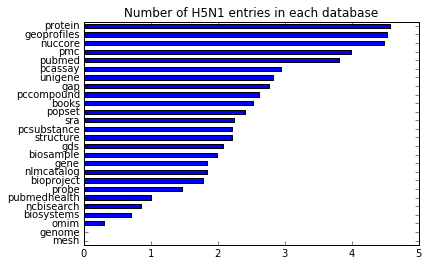

In [50]:
df = pd.DataFrame(data=data, index=index, dtype=float)  # note the cast into floats
df.sort_values(0, ascending=True, inplace=True)

_ = log10(df).plot(kind='barh', legend=False, logx=False, 
            title="Number of H5N1 entries in each database")